In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.xkcd()
plt.rcParams['font.family'] = "xkcd"

In [3]:
from io import StringIO

def load_csv(path, names):
    lines = []
    with open(path, "r") as f:
        for line in f.readlines():
            if "OOM" in line:
                continue
            lines.append(line)
    df = pd.read_csv(
        StringIO("\n".join(lines)),
        header=None,
        names=names
    )
    return df

In [4]:
small_model_no_offload_df = load_csv(
    "./batch-size-memory-modeling-0.5B/results-no-optimizer-offload.csv",
    names=['Batch size', 'Allocated MiB', 'Reserved MiB', 'Iterations/second']
)
print(small_model_no_offload_df.head())

   Batch size  Allocated MiB  Reserved MiB  Iterations/second
0           1          14048         16538           4.348797
1           2          20228         21662           2.368082


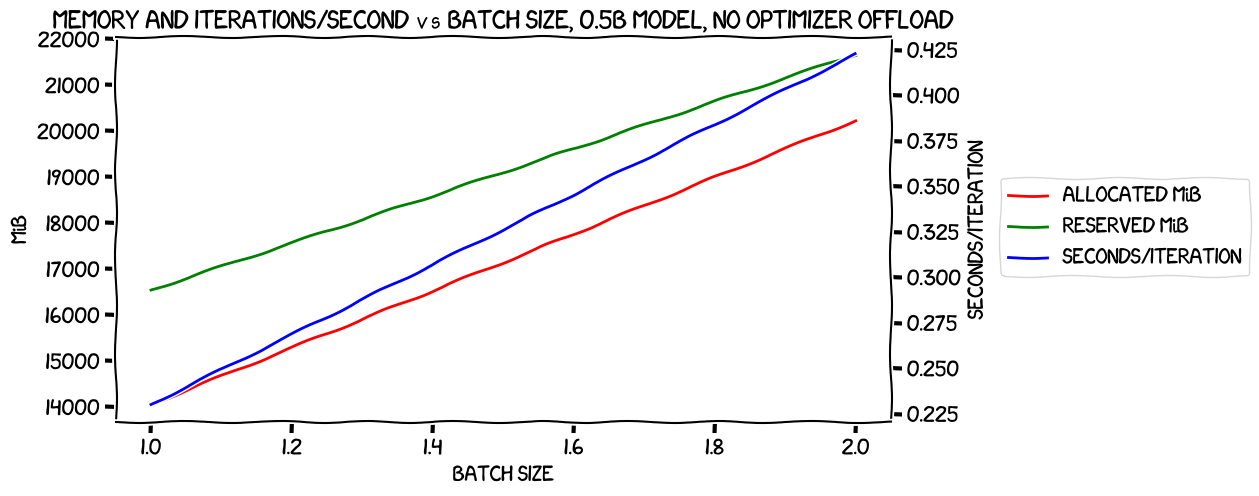

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Allocated MiB'], label='ALLOCATED MiB', color='red')
ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Reserved MiB'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(small_model_no_offload_df['Batch size'], 1 / small_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')

plt.title('MEMORY AND ITERATIONS/SECOND vs BATCH SIZE, 0.5B MODEL, NO OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-iterations-per-second-vs-batch-size-small-model-no-offload.png", bbox_inches='tight')
plt.show()

In [6]:
small_model_with_offload_df = load_csv(
    "./batch-size-memory-modeling-0.5B/results-with-optimizer-offload.csv",
    names=['Batch size', 'Allocated MiB', 'Reserved MiB', 'Iterations/second']
)
print(small_model_with_offload_df.head())

   Batch size  Allocated MiB  Reserved MiB  Iterations/second
0           1           6023          7244           1.450000
1           2           9702         10204           1.079142
2           3          13381         14364           0.883156
3           4          17060         18684           0.734090
4           5          20740         21884           0.637688


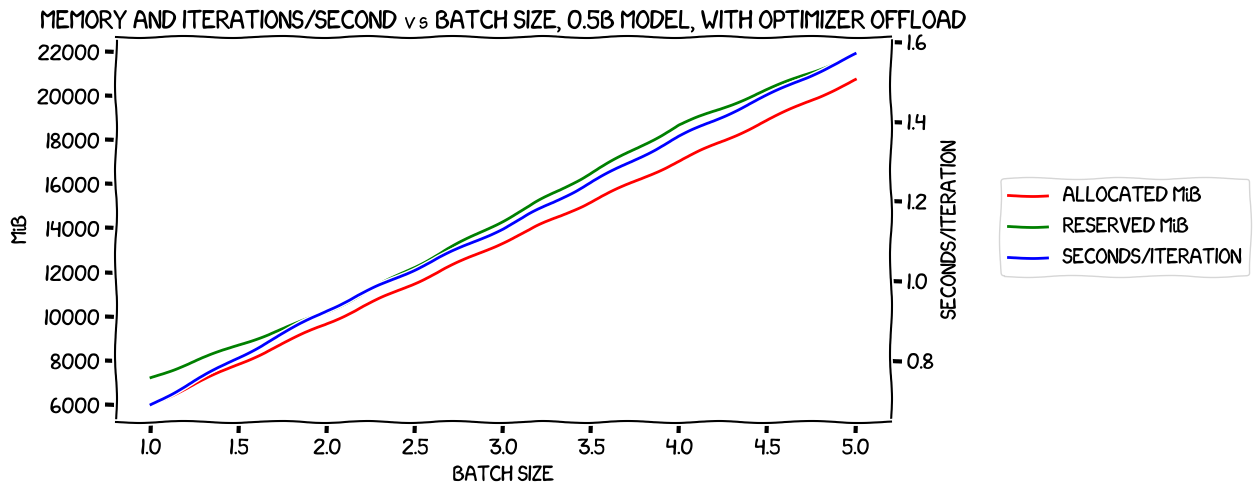

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Allocated MiB'], label='ALLOCATED MiB', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Reserved MiB'], label='RESERVED MiB', color='green')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(small_model_with_offload_df['Batch size'], 1 / small_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION', color='blue')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')

plt.title('MEMORY AND ITERATIONS/SECOND vs BATCH SIZE, 0.5B MODEL, WITH OPTIMIZER OFFLOAD')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-iterations-per-second-vs-batch-size-small-model-with-offload.png", bbox_inches='tight')
plt.show()

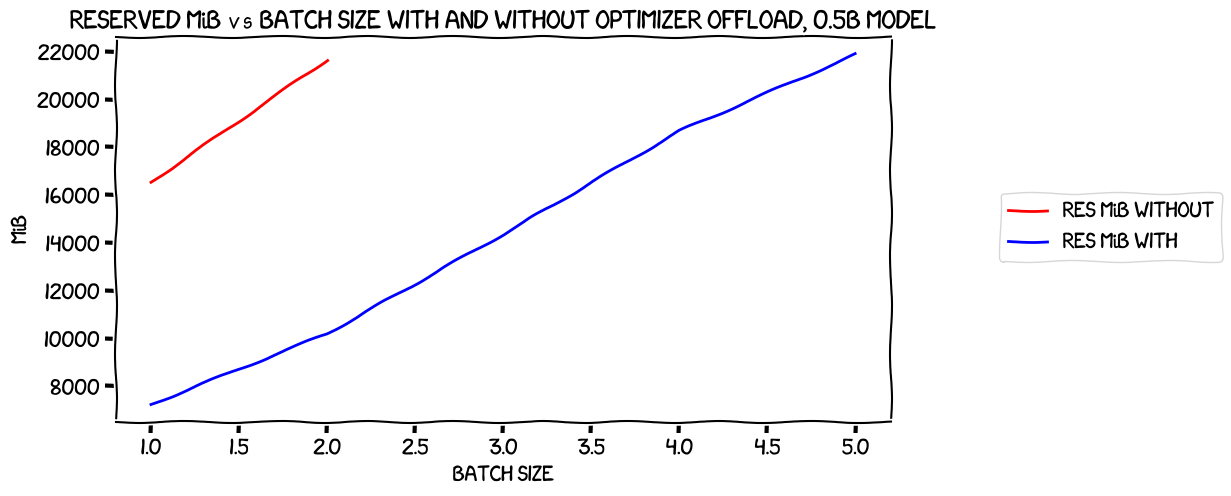

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Reserved MiB'], label='RES MiB WITHOUT', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Reserved MiB'], label='RES MiB WITH', color='blue')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')

plt.title('RESERVED MiB vs BATCH SIZE WITH AND WITHOUT OPTIMIZER OFFLOAD, 0.5B MODEL')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-iterations-per-second-vs-batch-size-small-model-with-offload.png", bbox_inches='tight')
plt.show()

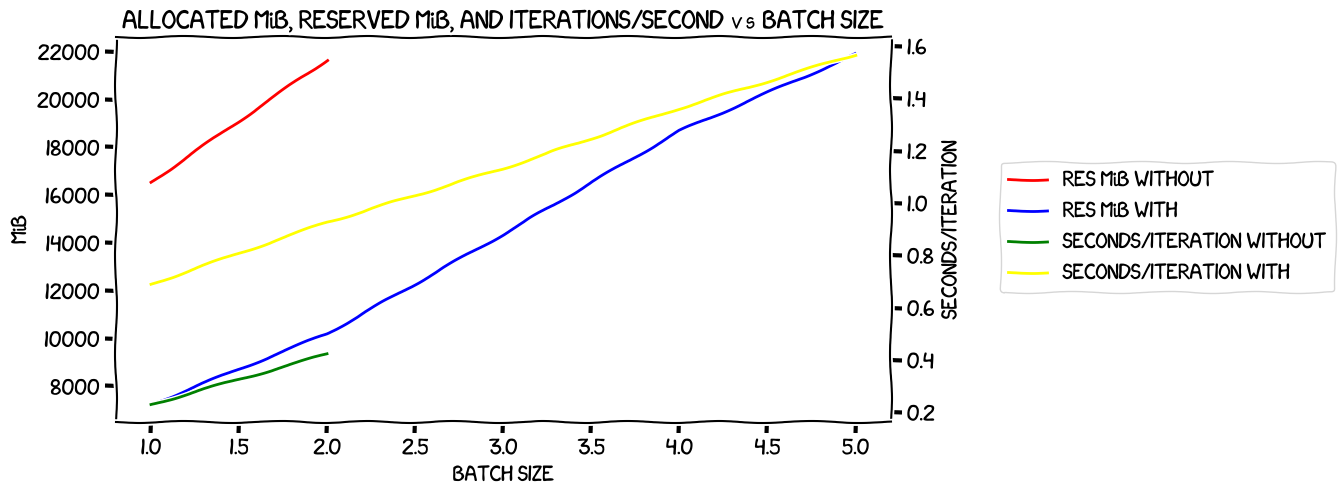

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(small_model_no_offload_df['Batch size'], small_model_no_offload_df['Reserved MiB'], label='RES MiB WITHOUT', color='red')
ax1.plot(small_model_with_offload_df['Batch size'], small_model_with_offload_df['Reserved MiB'], label='RES MiB WITH', color='blue')
ax1.set_xlabel('BATCH SIZE')
ax1.set_ylabel('MiB')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(small_model_no_offload_df['Batch size'], 1 / small_model_no_offload_df['Iterations/second'], label='SECONDS/ITERATION WITHOUT', color='green')
ax2.plot(small_model_with_offload_df['Batch size'], 1 / small_model_with_offload_df['Iterations/second'], label='SECONDS/ITERATION WITH', color='yellow')
ax2.set_ylabel('SECONDS/ITERATION')
ax2.tick_params(axis='y')

plt.title('ALLOCATED MiB, RESERVED MiB, AND ITERATIONS/SECOND vs BATCH SIZE')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/tmp/memory-and-iterations-per-second-vs-batch-size-small-model-with-offload.png", bbox_inches='tight')
plt.show()